# Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.


# Входные данные
В качестве входных данных вы имеете 4 csv-файла:

1) groups.csv – файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа)<br>
   2) groups_add.csv – дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных<br>
   3) active_studs.csv – файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.<br>
   4) checks.csv – файл с информацией об оплатах пользователей в дни проведения эксперимента. 

# Вопросы

   - На какие метрики вы смотрите в ходе анализа и почему?
   - Имеются ли различия в показателях и с чем они могут быть связаны?
   - Являются ли эти различия статистически значимыми?
   - Стоит ли запускать новую механику на всех пользователей?



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest


# Функции

In [2]:
def primary_analysis(df):
    """Функция, для просмотра информации о датафрейме """
    display(df.head())
    df.info()
    print(f"Количество дубликатов в таблице : {df.duplicated().sum()}")

In [3]:
def pie_bar(df,cat_cols):
    """функция для построения круговых диаграм и столбчатых.
    На вход принимается dataframe и список с названиями столбцов категориальных признаков.
    Так же может принимать вместо списка, ситроку"""
    sns.set(style="whitegrid")
    if type(cat_cols)==str:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        plt.subplot(ax[0])
        df[cat_cols].value_counts().plot(kind = 'pie',autopct = '%1.0f%%')
        plt.subplot(ax[1])
        sns.countplot(data = df, x=cat_cols)
    else:
        fig,axes = plt.subplots(nrows=len(cat_cols),ncols=2, figsize=(10, 25))
        for index,title in enumerate(cat_cols):
            explode = [0.2 for counter in range(len(df[title].value_counts()))]
            pie_tmp = df[title].value_counts().plot(kind = 'pie',
                                      autopct = '%1.0f%%',
                                      counterclock=False,
                                      shadow=True,
                                      explode =explode,title = title,
                                      ax=axes[index][0])
            pie_tmp.set_ylabel('')
            sns.countplot(data = df, x=title,ax=axes[index][1])
            fig.tight_layout()

In [4]:
def hist_box(df, num_cols):
    """Функция для построения гистограмм и ящиков с усами."""
    sns.set(style="whitegrid")
    n_cols = len(num_cols)
    fig, axes = plt.subplots(nrows=n_cols, ncols=2, figsize=(15, 5*n_cols))
    
    # Гарантируем, что axes всегда двумерный массив
    axes = np.reshape(axes, (n_cols, 2))
    
    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i][0])
        sns.boxplot(data=df, x=col, ax=axes[i][1])
        axes[i][0].set_title(f'Гистограмма: {col}')
        axes[i][1].set_title(f'Boxplot: {col}')
    
    fig.tight_layout()
    plt.show()

## Загрузка данных

In [5]:
df_groups = pd.read_csv('groups.csv',sep=';')
df_group_add = pd.read_csv('group_add.csv')
df_activ = pd.read_csv('active_studs.csv')
df_checks = pd.read_csv('checks.csv',sep=';')

In [6]:
primary_analysis(df_groups)

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
Количество дубликатов в таблице : 0


In [7]:
primary_analysis(df_group_add)

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
Количество дубликатов в таблице : 0


In [8]:
primary_analysis(df_activ)

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB
Количество дубликатов в таблице : 0


In [9]:
primary_analysis(df_checks)

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
Количество дубликатов в таблице : 0


## Вывод 
Названия столбцов соответствуют Snake case.
Пропусков в значениях не обноружено. Дубликаты так же отсутствуют


# Предобработка данных

In [10]:
df_groups_total = pd.concat([df_groups, df_group_add])

In [11]:
df_groups_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74576 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74576 non-null  int64 
 1   grp     74576 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
df_groups_total.rename(columns={'id': 'student_id'}, inplace=True)

In [13]:
df_groups_total.head()

,student_id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [14]:
df_full_activ = df_activ.merge(df_checks,how='left',on='student_id')
df_full_activ.head()


,student_id,rev
0,581585,NaN
1,5723133,NaN
2,3276743,NaN
3,4238589,NaN
4,4475369,NaN


In [15]:


full_activ_rev = df_full_activ.merge(df_groups_total,how='left',on='student_id')
full_activ_rev.head()
     


,student_id,rev,grp
0,581585,NaN,A
1,5723133,NaN,A
2,3276743,NaN,B
3,4238589,NaN,A
4,4475369,NaN,B


In [16]:
full_activ_rev['rev']=full_activ_rev['rev'].fillna(0)

In [17]:
full_activ_rev.head()

,student_id,rev,grp
0,581585,0.0,A
1,5723133,0.0,A
2,3276743,0.0,B
3,4238589,0.0,A
4,4475369,0.0,B


## Вывод
Обьеденили данные в один датасет full_activ_rev.
nan заменили на 0

## Анализ полученных данных

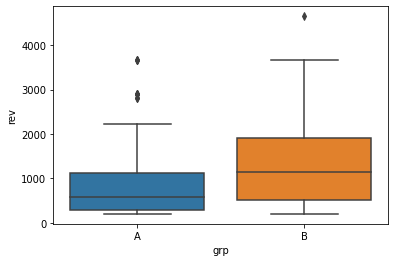

In [18]:
sns.boxplot(data=full_activ_rev.query('rev>0'), x='grp', y='rev');

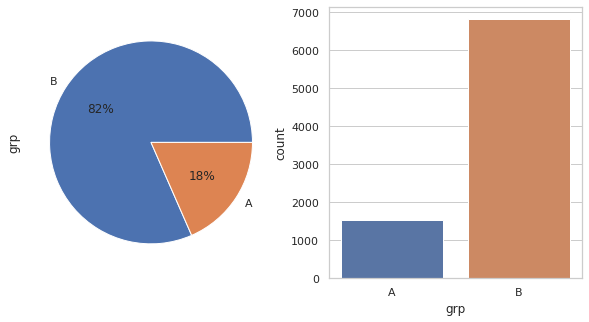

In [19]:
pie_bar(full_activ_rev,"grp")

По графикам видна что группа "B" значительно преобладаен над группой "A"

In [20]:
# разделим датасет на группы
df_A=full_activ_rev.query('grp=="A"')
df_B=full_activ_rev.query('grp=="B"')

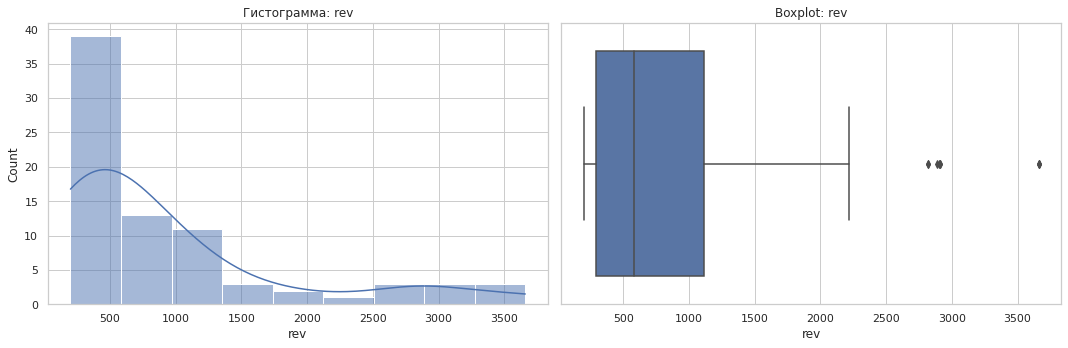

In [21]:
hist_box(df_A.query('rev>0'),['rev'])

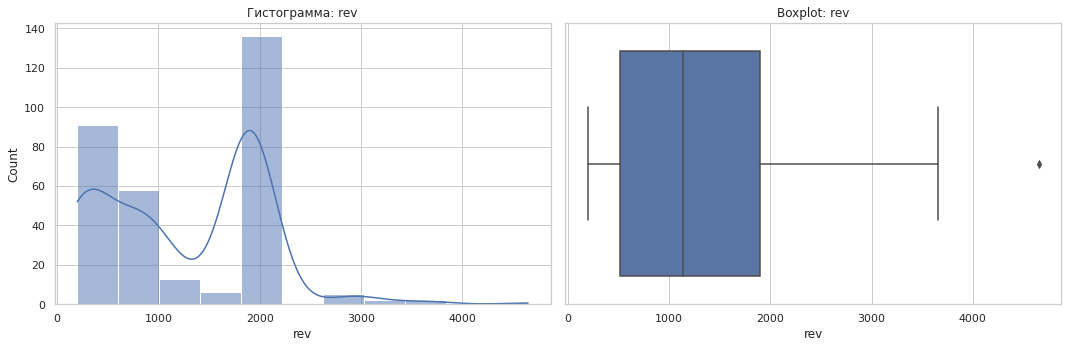

In [22]:
hist_box(df_B.query('rev>0'),['rev'])

In [23]:
print(stats.normaltest(df_A.query('rev>0').rev))
print(stats.normaltest(df_B.query('rev>0').rev))

NormaltestResult(statistic=30.378419638487458, pvalue=2.531686880422046e-07)
NormaltestResult(statistic=6.795662714490353, pvalue=0.033445723194625424)


По графикам и тестам на нормальность видно что распределения не нормальны.
На графиках групп "A" и "B" видны различия в оплате


# Определение основных метрик

Анализ начнём с отслеживания ключевых бизнес-метрик в ходе эксперимента.
Поскольку мы оцениваем влияние изменений в платежной системе на финансовые результаты компании, основное внимание уделим показателям выручки:

  - ARPU (average revenue per user) — средняя выручка на пользователя;

  - ARPPU (average revenue per paying user) — средняя выручка на платящего пользователя. Эти метрики обычно актуальны в маркетплейсах, потому что они оценивают в целом, сколько заказов каждый клиент делает.

  - CR (Conversion Rate) — это коэффициент конверсии, который показывает процент пользователей, совершивших целевое действие (например, покупку, подписку, регистрацию) от общего числа посетителей



In [24]:
print(f"ARPU в группе А: {round(df_A['rev'].mean(),2)}\n"
      f"ARPU в группе В: {round(df_B['rev'].mean(),2)}")

ARPU в группе А: 47.35
ARPU в группе В: 58.06


In [25]:
print(f"ARPPU в группе А: {round(df_A.query('rev>0')['rev'].mean(),2)}\n"
      f"ARPPU в группе В: {round(df_B.query('rev>0')['rev'].mean(),2)}")

ARPPU в группе А: 933.59
ARPPU в группе В: 1257.88


In [26]:
print(f"CR в группе А: {round(df_A.query('rev>0')['student_id'].count() / df_A['student_id'].count()*100,2)}%\n"
      f"CR в группе В: {round(df_B.query('rev>0')['student_id'].count() / df_B['student_id'].count()*100,2)}%")

CR в группе А: 5.07%
CR в группе В: 4.62%



# Определение гипотез.

В экспериментальной группе выросли ARPU и ARPPU, но снизился CR. Новая механика оплаты, вероятно, стимулировала более крупные покупки, увеличивая средний чек, но могла отпугнуть часть пользователей из-за новой механики, что снизило конверсию.

Из-за ненормальности распределений ARPU и ARPPU с выбросами используем бутстрэп — он надежнее оценивает доверительные интервалы без предположений о нормальности.

Гипотеза для ARPU и ARPPU:

Нулевая гипотеза (H0): Новая механика оплаты не имеет значимого влияния на средний доход на пользователя (ARPU) и средний доход на платящего пользователя (ARPPU).

Альтернативная гипотеза (H1): Новая механика оплаты приводит к статистически значимому увеличению среднего дохода на пользователя (ARPU) и среднего дохода на платящего пользователя (ARPPU).

Гипотеза для CR:

Нулевая гипотеза (H0): Новая механика оплаты не оказывает значимого влияния на коэффициент конверсии (CR), и изменения случайны.

Альтернативная гипотеза (H1): Новая механика оплаты приводит к статистически значимому снижению коэффициента конверсии (CR).


In [27]:
def mean_diff_func(group_a, group_b):
    return np.mean(group_b) - np.mean(group_a)


In [28]:
# Всё в одном - ручной бутстрап
def bootstrap_analysis(group_a, group_b, func, n_bootstrap=10000, ci=95, random_state=42):
    np.random.seed(random_state)
    boot_diffs = []
    
    for _ in range(n_bootstrap):
        sample_a = np.random.choice(group_a, size=len(group_a), replace=True)
        sample_b = np.random.choice(group_b, size=len(group_b), replace=True)
        boot_diffs.append(func(sample_a, sample_b))
    
    boot_diffs = np.array(boot_diffs)
    lower = np.percentile(boot_diffs, (100-ci)/2)
    upper = np.percentile(boot_diffs, 100 - (100-ci)/2)
    
    return boot_diffs, (lower, upper)

In [29]:
# Получаем данные
bootstrap_dist_rev, conf_interval_rev = bootstrap_analysis(
    df_A.query('rev>0')['rev'].values,
    df_B.query('rev>0')['rev'].values,
    mean_diff_func,
    random_state=42
)

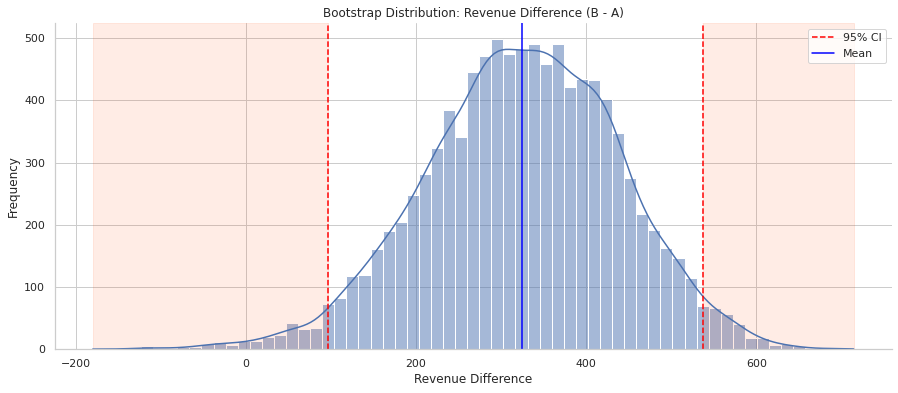

In [30]:
def plot_distrib(data, conf_interval, metric):
    plt.figure(figsize=(15, 6))
    ax = sns.histplot(data, kde=True)
    ax.axvline(conf_interval[0], linestyle='dashed', color='red', label='95% CI')
    ax.axvline(conf_interval[1], linestyle='dashed', color='red')
    ax.axvline(np.mean(data), linestyle='-', color='blue', label='Mean')
    ax.axvspan(data.min(), conf_interval[0], color='orangered', alpha=0.1)
    ax.axvspan(data.max(), conf_interval[1], color='orangered', alpha=0.1)
    ax.set_xlabel(f'{metric} Difference')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Bootstrap Distribution: {metric} Difference (B - A)')
    ax.legend()
    sns.despine()
    plt.show()

plot_distrib(bootstrap_dist_rev, conf_interval_rev, 'Revenue')

Мы видим на графике что 0 не попадает в доверительный интервал, соответственно мы можем отклонить Н0 - ARPPU в группах различается.

In [31]:
bootstrap_dist, conf_interval = bootstrap_analysis(
    df_A['rev'].values,
    df_B['rev'].values,
    mean_diff_func,
    random_state=42
)

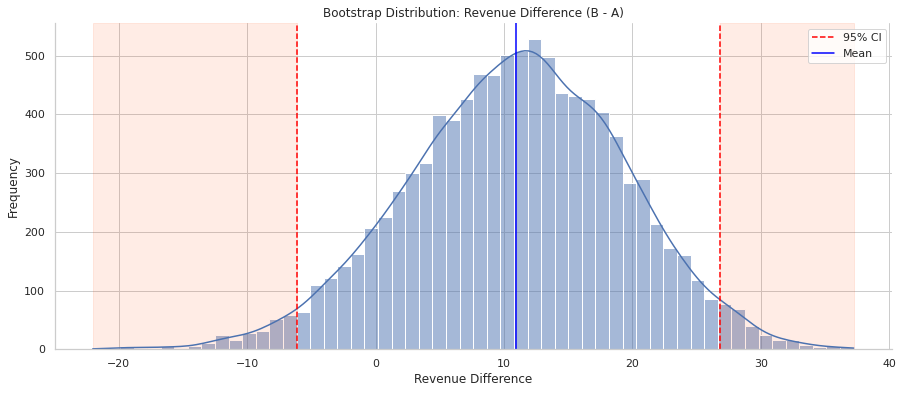

In [33]:
plot_distrib(bootstrap_dist, conf_interval, 'Revenue')

Мы видим на графике что 0 попадает в доверительный интервал, соответственно мы не можем отклонить Н0.

In [43]:

success_a = (df_A['rev'] > 0).sum()
total_a = len(df_A)
success_b = (df_B['rev'] > 0).sum()
total_b = len(df_B)

count = np.array([success_a, success_b])
nobs = np.array([total_a, total_b])

z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')
print(f"CR A: {success_a/total_a:.4f}, CR B: {success_b/total_b:.4f}")
print(f"p-value: {p_value:.6f}")

CR A: 0.0507, CR B: 0.0462
p-value: 0.445470


Значение p-value > 0.05 - соответственно у нас нет оснований отклонить нулевую гипотезу.

In [54]:
df_A.query('rev>0').describe()

,student_id,rev
count,7.800000e+01,78.000000
mean,2.924680e+06,933.589744
std,1.657487e+06,919.932711
min,1.627000e+03,199.000000
25%,1.403057e+06,290.000000
50%,3.176553e+06,585.000000
75%,4.345213e+06,1114.750000
max,5.577840e+06,3660.000000


In [55]:
df_B.query('rev>0').describe()

,student_id,rev
count,3.140000e+02,314.000000
mean,2.829809e+06,1257.878992
std,1.610683e+06,790.864254
min,1.003000e+05,199.000000
25%,1.290454e+06,511.750000
50%,3.092955e+06,1140.000000
75%,4.192409e+06,1900.000000
max,5.740903e+06,4650.000000


In [59]:
df_B

,student_id,rev,grp
2,3276743,0.0,B
4,4475369,0.0,B
5,5481015,0.0,B
6,1353433,0.0,B
8,1170611,0.0,B
...,...,...,...
8336,1794344,0.0,B
8337,296883,0.0,B
8338,3598448,0.0,B
8339,3610547,290.0,B



# Вывод

В ходе работы мы выбрали метрики:

   - ARPU (average revenue per user) — средняя выручка на пользователя;

   - ARPPU (average revenue per paying user) — средняя выручка на платящего пользователя. Эти метрики обычно актуальны в маркетплейсах, потому что они оценивают в целом, сколько заказов каждый клиент делает.

   - CR (Conversion Rate) — это коэффициент конверсии, который показывает процент пользователей, совершивших целевое действие (например, покупку, подписку, регистрацию) от общего числа посетителей

Так как мы оцениваем влияние изменений в платежной системе на финансовые результаты компании.
Средняя доходность с активного и платящего пользователя увеличилась у группы "В". Связано это с более крупнымы покупками. 

В ходе последнего эксперемента, выяснили, что новая механика оплаты не оказывает значимого влияния на коэффициент конверсии, следовательно не стоит запускать новую механику оплаты.
